Prerna Ladkani

Roll:37,Div:D11AD

DAV Eperiment 3

Aim: Multiple Linear Regression in Python and R

Python

Task to be performed :
1.List the packages to be used for Multiple Linear Regression in Python

2.Download the dataset from UCI Repository / Kaggle

-- Load data into Google Colab

-- Display the summary of the dataset

3.Create a model and fit it

4.Get the values : Coefficient of Determination, Intercept and Coefficients

5.Predict the response

6.Visualize the results with a graph

7.Repeat the steps 2 to 6 using R libraries

8.Prepare a Colab Notebook with the Aim, Tasks performed, Program, Output, and Conclusion and upload the Notebook in your Github Repositiry.

9.Prepare a handwritten wrtieup with Aim, Theory and Conclusion.

In [1]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [3]:
# importing data
df = pd.read_csv('Real-estate1.csv')
df.drop('No', inplace = True,axis=1)

print(df.head())
print(df.columns)


   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

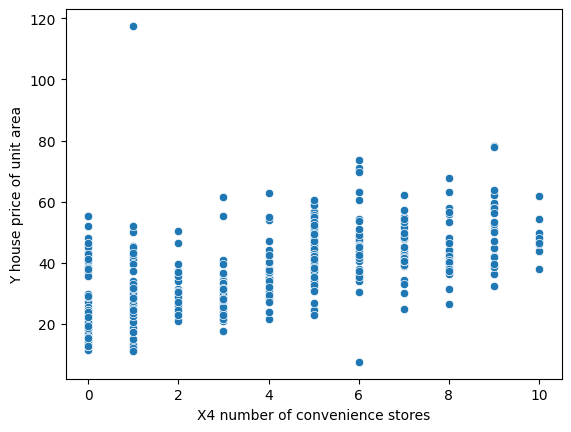

In [4]:
# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores',
				y='Y house price of unit area', data=df)


In [5]:
# creating feature variables
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)


     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [6]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=101)


In [7]:
# creating a regression model
model = LinearRegression()


In [8]:
# fitting the model
model.fit(X_train,y_train)


LinearRegression()

In [9]:
# making predictions
predictions = model.predict(X_test)


In [10]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  46.21179783492909
mean_absolute_error :  5.392293684756193


In [11]:
# getting the coefficient of determination (R²)
r_squared = model.score(X_test, y_test)
print('Coefficient of Determination (R²): ', r_squared)

# getting the intercept
intercept = model.intercept_
print('Intercept: ', intercept)

# getting the coefficients
coefficients = model.coef_
print('Coefficients: ', coefficients)


Coefficient of Determination (R²):  0.6509058479987158
Intercept:  -18595.05503451969
Coefficients:  [ 4.83926101e+00 -2.74749120e-01 -4.18860818e-03  1.18123112e+00
  2.42384317e+02  2.33991349e+01]


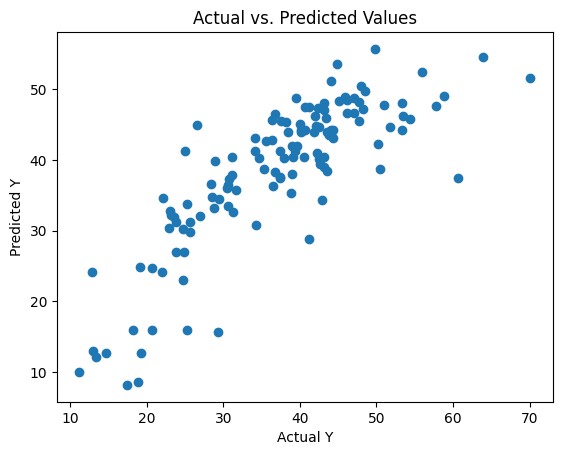

In [12]:
# Visualizing the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Values')
plt.show()


R

In [2]:
# Multiple Linear Regression

# Importing the dataset
dataset = read.csv('data2.csv')

# Encoding categorical data
dataset$State = factor(dataset$State,
					levels = c('New York', 'California', 'Florida'),
					labels = c(1, 2, 3))
dataset$State


[1] 1 2 3 1 3 1 2 3 1 2
Levels: 1 2 3

In [6]:
# Importing the dataset
dataset <- read.csv('data2.csv')

# Encoding categorical data
dataset$State <- factor(dataset$State,
                        levels = c('New York', 'California', 'Florida'),
                        labels = c(1, 2, 3))

# Splitting the dataset into the Training set and Test set
install.packages('caTools')
library(caTools)
set.seed(123)
split <- sample.split(dataset$Profit, SplitRatio = 0.8)
training_set <- subset(dataset, split == TRUE)
test_set <- subset(dataset, split == FALSE)

# Fitting Multiple Linear Regression to the Training set
regressor <- lm(formula = Profit ~ ., data = training_set)

# Getting the Coefficient of Determination (R^2)
r_squared <- summary(regressor)$r.squared
cat('Coefficient of Determination (R²): ', r_squared, '\n')

# Getting the Intercept
intercept <- coef(regressor)[1]
cat('Intercept: ', intercept, '\n')

# Getting the Coefficients
coefficients <- coef(regressor)[-1]  # excluding the intercept
cat('Coefficients: ', coefficients, '\n')

# Predicting the Test set results
y_pred <- predict(regressor, newdata = test_set)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Coefficient of Determination (R²):  0.9568878 
Intercept:  28157.84 
Coefficients:  0.8884486 0.0566959 0.02858616 -2860.859 9171.833 


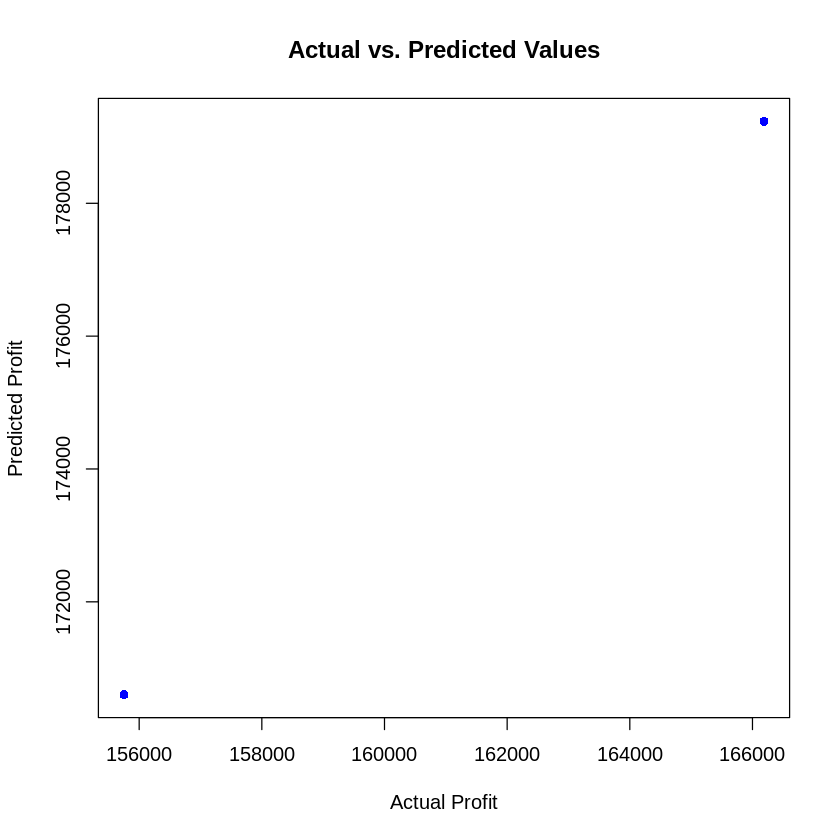

In [7]:
# Predicting the response on the Test set
y_pred <- predict(regressor, newdata = test_set)

# Visualizing the results
plot(test_set$Profit, y_pred, main = 'Actual vs. Predicted Values',
     xlab = 'Actual Profit', ylab = 'Predicted Profit', col = 'blue', pch = 16)
abline(0, 1, col = 'red')


Conclusion : Thus we have successfully performed multiple linear regression in python and R